<a href="https://colab.research.google.com/github/theone-daxia/ai-pdf-translator/blob/main/plumber_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/DjangoPeng/openai-quickstart.git

Cloning into 'openai-quickstart'...
remote: Enumerating objects: 683, done.
remote: Counting objects: 100% (439/439), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 683 (delta 290), reused 266 (delta 215), pack-reused 244
Receiving objects: 100% (683/683), 56.86 MiB | 14.95 MiB/s, done.
Resolving deltas: 100% (343/343), done.


In [ ]:
!cp openai-quickstart/openai-translator/tests/The_Old_Man_of_the_Sea.pdf .
!cp openai-quickstart/openai-translator/tests/test.pdf .

In [ ]:
!pip install pdfplumber

In [6]:
import pdfplumber

pdf = pdfplumber.open("The_Old_Man_of_the_Sea.pdf")

In [7]:
pdf.metadata

{'CreationDate': "D:20060717205532+08'00'",
 'Subject': 'For Personal Learning!',
 'Author': 'Asiaing.com',
 'Creator': 'PScript5.dll Version 5.2',
 'Producer': 'Acrobat Distiller 7.0.5 (Windows)',
 'ModDate': "D:20060717210222+08'00'",
 'Title': 'Hemingway, Ernest - The Old Man and the Sea'}

In [ ]:
pdf.pages

In [9]:
pdf = pdfplumber.open("test.pdf")

In [10]:
pages = pdf.pages
print(pages)

[<Page:1>, <Page:2>]


In [11]:
pages[0].page_number

1

In [12]:
print(pages[0].width, pages[0].height)

595 842


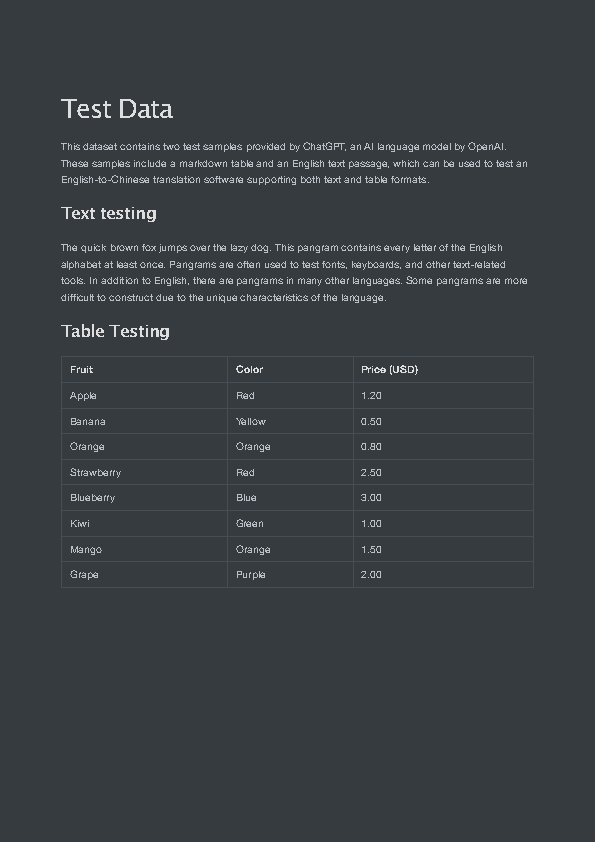

In [13]:
# 可视化第一页
pages[0].to_image()

In [14]:
p1_text = pages[0].extract_text()

In [15]:
print(p1_text)

Test Data
This dataset contains two test samples provided by ChatGPT, an AI language model by OpenAI.
These samples include a markdown table and an English text passage, which can be used to test an
English-to-Chinese translation software supporting both text and table formats.
Text testing
The quick brown fox jumps over the lazy dog. This pangram contains every letter of the English
alphabet at least once. Pangrams are often used to test fonts, keyboards, and other text-related
tools. In addition to English, there are pangrams in many other languages. Some pangrams are more
difficult to construct due to the unique characteristics of the language.
Table Testing
Fruit Color Price (USD)
Apple Red 1.20
Banana Yellow 0.50
Orange Orange 0.80
Strawberry Red 2.50
Blueberry Blue 3.00
Kiwi Green 1.00
Mango Orange 1.50
Grape Purple 2.00


In [16]:
p1_text = pages[0].extract_text(layout=True)

In [17]:
print(p1_text)

                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
        Test    Data                                                              
                                                                                  
                                                                                  
                                                                                  
        This dataset contains two test samples provided by ChatGPT, an AI language mode

In [18]:
p1_table = pages[0].extract_table()

In [20]:
print(p1_table)

[['Fruit', 'Color', 'Price (USD)'], ['Apple', 'Red', '1.20'], ['Banana', 'Yellow', '0.50'], ['Orange', 'Orange', '0.80'], ['Strawberry', 'Red', '2.50'], ['Blueberry', 'Blue', '3.00'], ['Kiwi', 'Green', '1.00'], ['Mango', 'Orange', '1.50'], ['Grape', 'Purple', '2.00']]


In [21]:
tables = pages[0].extract_tables()

In [22]:
tables

[[['Fruit', 'Color', 'Price (USD)'],
  ['Apple', 'Red', '1.20'],
  ['Banana', 'Yellow', '0.50'],
  ['Orange', 'Orange', '0.80'],
  ['Strawberry', 'Red', '2.50'],
  ['Blueberry', 'Blue', '3.00'],
  ['Kiwi', 'Green', '1.00'],
  ['Mango', 'Orange', '1.50'],
  ['Grape', 'Purple', '2.00']]]

In [23]:
p1_debug_table = pages[0].debug_tablefinder()

In [24]:
p1_debug_table.tables

In [26]:
# 使用 Pandas.DataFrame 来展示和存储表格
import pandas as pd
df = pd.DataFrame(p1_table[1:], columns=p1_table[0])

In [27]:
df

,Fruit,Color,Price (USD)
0,Apple,Red,1.20
1,Banana,Yellow,0.50
2,Orange,Orange,0.80
3,Strawberry,Red,2.50
4,Blueberry,Blue,3.00
5,Kiwi,Green,1.00
6,Mango,Orange,1.50
7,Grape,Purple,2.00


In [29]:
# 从 PageImage 中获取页面图像分辨率
pages[1].images

[{'x0': 61.25348,
  'y0': 443.9213,
  'x1': 533.74648,
  'y1': 801.8948,
  'width': 472.493,
  'height': 357.97350000000006,
  'stream': <PDFStream(17): raw=1522591, {'Type': /'XObject', 'Subtype': /'Image', 'Width': 1288, 'Height': 975, 'Interpolate': True, 'ColorSpace': <PDFObjRef:18>, 'Intent': /'Perceptual', 'BitsPerComponent': 8, 'Length': 1522590, 'Filter': /'FlateDecode'}>,
  'srcsize': (1288, 975),
  'imagemask': None,
  'bits': 8,
  'colorspace': [[/'ICCBased',
    <PDFStream(19): raw=2758, {'N': 3, 'Alternate': /'DeviceRGB', 'Length': 2757, 'Filter': /'FlateDecode'}>]],
  'mcid': None,
  'tag': None,
  'object_type': 'image',
  'page_number': 2,
  'top': 40.10519999999997,
  'bottom': 398.0787,
  'doctop': 882.1052}]

In [31]:
img = pages[1].images[0]

In [33]:
bbox = (img["x0"], img["top"], img["x1"], img["bottom"])

In [34]:
cropped_page = pages[1].crop(bbox)

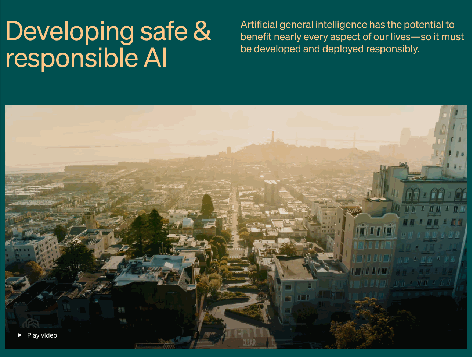

In [36]:
# 可视化裁剪后的第二页
cropped_page.to_image()

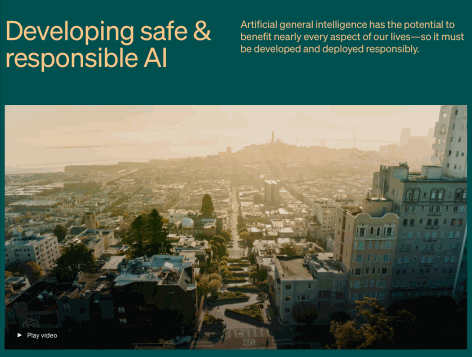

In [37]:
# 抗锯齿
cropped_page.to_image(antialias=True)

In [39]:
# 设置分辨率
im = cropped_page.to_image(resolution=1080)
im.save("pdf_img_test_1080p.png")